<a href="https://colab.research.google.com/github/otitamario/sp-pa-gep/blob/main/notebooks/Experiment_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository into Colab runtime
!git clone https://github.com/otitamario/sp-pa-gep.git

# Move into repo root
%cd sp-pa-gep

# Make sure Python sees the project root
import sys
import os

# Move to repo root if needed
if not os.path.exists("src"):
    %cd sp-pa-gep

sys.path.append(".")

Cloning into 'sp-pa-gep'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 86 (delta 30), reused 35 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (86/86), 738.65 KiB | 7.46 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/sp-pa-gep


In [2]:
import sys
sys.path.append("..")

In [3]:
# Projection onto C(x)
import numpy as np

def projection_C(z, x):
    """
    Projection onto C(x) = { y >= 0 : y1 + y2 <= 1 + 0.3*(x1 + x2) }
    """
    z = np.maximum(z, 0.0)
    cap = 1.0 + 0.3 * np.sum(x)

    if z.sum() <= cap:
        return z

    # Projection onto simplex with variable radius
    u = np.sort(z)[::-1]
    cssv = np.cumsum(u)
    rho = np.where(u * np.arange(1, len(u) + 1) > (cssv - cap))[0][-1]
    theta = (cssv[rho] - cap) / (rho + 1)
    return np.maximum(z - theta, 0.0)


In [7]:
# SPPA Implementation
def sppa_qep(x0, u, r=1.0, maxit=300, tol=1e-6):
    x = x0.copy()
    history = []

    for k in range(maxit):
        alpha = 1.0 / (k + 2)

        z = x / (1.0 + r)
        u_n = projection_C(z, x)

        x_new = alpha * u + (1 - alpha) * u_n
        err = np.linalg.norm(x_new - x)
        history.append(err)

        if err < tol:
            break
        x = x_new

    return x, np.array(history)


In [8]:
# WPPA Implementation
def wppa_qep(x0, r=1.0, maxit=300, tol=1e-6):
    x = x0.copy()
    history = []

    for k in range(maxit):
        alpha = 1.0 / (k + 2)

        z = x / (1.0 + r)
        u_n = projection_C(z, x)

        x_new = alpha * x + (1 - alpha) * u_n
        err = np.linalg.norm(x_new - x)
        history.append(err)

        if err < tol:
            break
        x = x_new

    return x, np.array(history)


In [9]:
# Run the Experiment
# Initial data
x0 = np.array([1.5, 1.5])
u = np.zeros(2)
r = 1.0

x_sppa, hist_sppa = sppa_qep(x0, u, r)
x_wppa, hist_wppa = wppa_qep(x0, r)


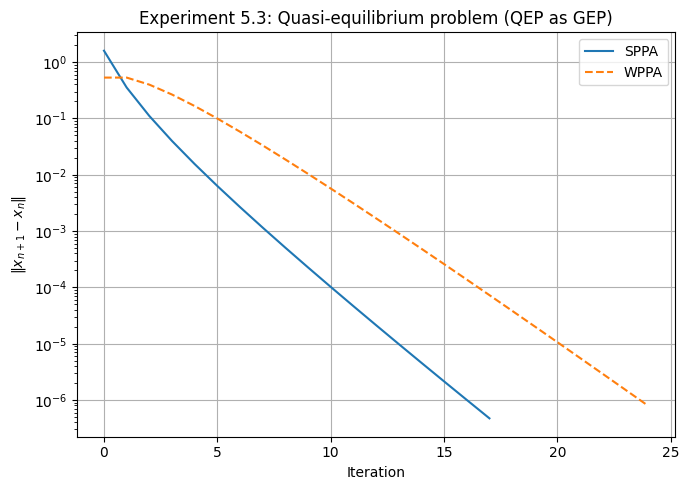

In [10]:
# Ploting
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.semilogy(hist_sppa, label="SPPA")
plt.semilogy(hist_wppa, '--', label="WPPA")
plt.xlabel("Iteration")
plt.ylabel(r"$\|x_{n+1}-x_n\|$")
plt.title("Experiment 5.3: Quasi-equilibrium problem (QEP as GEP)")
plt.legend()
plt.grid(True)
plt.tight_layout()
# Save BEFORE show
plt.savefig("figures/exp5.3_QEP.png", dpi=300, bbox_inches="tight")
plt.show()